In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
demographic_data = "resources/Demographics.csv"
birth_data = "resources/Birth_Statistics.csv"
cancer_data = "resources/Cancer_Rates.csv"
hospital_data = "resources/Hospitalization_Discharge_Rates.csv"
health_data = "resources/LakeCounty_Health.csv"
mortality_data = "resources/Mortality_Rates.csv"
obesity_data = "resources/Obesity_Percentages.csv"


# Read the demographics data and the study results
county_demographic_data = pd.read_csv(demographic_data)
county_birth_data = pd.read_csv(birth_data)
county_cancer_data = pd.read_csv(cancer_data)
county_hospital_data = pd.read_csv(hospital_data)
county_mortality_data = pd.read_csv(mortality_data)
county_obesity_data = pd.read_csv(obesity_data)



In [2]:
# Read and study cancer data
county_cancer_data = pd.read_csv(cancer_data)
county_cancer_data.head()

,FID,ZIP,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,SHAPE_Length,SHAPE_Area
0,1,60002,218.062127,419.666735,399.094836,259.205925,259.205925,2703.147501,215525.155184,1.149062e+09
1,2,60010,258.915706,335.464697,504.322767,499.819885,227.395533,3248.829251,178637.109618,8.027354e+08
2,3,60015,153.435867,230.153801,478.573777,442.041428,222.847331,2922.587952,111400.890558,3.674576e+08
3,4,60020,292.797189,507.515128,214.717939,302.557095,370.876440,3084.130392,92363.084625,1.666177e+08
4,5,60030,221.535432,284.440555,404.780789,322.730629,210.595411,2581.845035,247258.224672,8.455179e+08


In [3]:
# Read and study hospital data
county_hospital_data = pd.read_csv(hospital_data)
county_hospital_data.head()

,OBJECTID,ZIP,Anxiety_Di,Mood_Disor,Alcohol_re,Diabetes,Hypertensi,Asthma,F65_FallsER,Discharges,MH_ER,Total_MH,Total_ACSC,SHAPE_Length,SHAPE_Area
0,1,60002,393.608997,359.322499,270.177604,69.637883,20.481730,31.405320,14.946770,9590.103093,837.276281,1452.376054,0,215525.155184,-1.149062e+09
1,2,60010,132.835014,153.848463,177.863833,43.503045,19.501365,16.501155,9.941825,8955.508619,388.936419,733.969741,0,178637.109618,-8.027354e+08
2,3,60015,142.476163,231.371546,147.347143,18.720048,16.224042,6.240016,19.079395,8240.135205,496.383297,778.139042,0,111400.890558,-3.674576e+08
3,4,60020,201.704730,452.208992,406.662763,90.111739,66.081942,60.074492,23.283437,13394.283515,911.331251,1506.278873,0,92363.084625,-1.666177e+08
4,5,60030,261.648844,237.033796,250.708822,56.958420,37.972280,37.972280,20.297185,10486.759142,666.999426,1156.907256,0,247258.224672,-8.455179e+08


In [4]:
# Merge cancer and hospital data frames
combined_df = pd.merge(county_cancer_data, county_hospital_data, how='outer', on="ZIP")
# Display the data table for preview
combined_df.head()

,FID,ZIP,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,SHAPE_Length_x,SHAPE_Area_x,...,Diabetes,Hypertensi,Asthma,F65_FallsER,Discharges,MH_ER,Total_MH,Total_ACSC,SHAPE_Length_y,SHAPE_Area_y
0,1,60002,218.062127,419.666735,399.094836,259.205925,259.205925,2703.147501,215525.155184,1.149062e+09,...,69.637883,20.481730,31.405320,14.946770,9590.103093,837.276281,1452.376054,0.0,215525.155184,-1.149062e+09
1,2,60010,258.915706,335.464697,504.322767,499.819885,227.395533,3248.829251,178637.109618,8.027354e+08,...,43.503045,19.501365,16.501155,9.941825,8955.508619,388.936419,733.969741,0.0,178637.109618,-8.027354e+08
2,3,60015,153.435867,230.153801,478.573777,442.041428,222.847331,2922.587952,111400.890558,3.674576e+08,...,18.720048,16.224042,6.240016,19.079395,8240.135205,496.383297,778.139042,0.0,111400.890558,-3.674576e+08
3,4,60020,292.797189,507.515128,214.717939,302.557095,370.876440,3084.130392,92363.084625,1.666177e+08,...,90.111739,66.081942,60.074492,23.283437,13394.283515,911.331251,1506.278873,0.0,92363.084625,-1.666177e+08
4,5,60030,221.535432,284.440555,404.780789,322.730629,210.595411,2581.845035,247258.224672,8.455179e+08,...,56.958420,37.972280,37.972280,20.297185,10486.759142,666.999426,1156.907256,0.0,247258.224672,-8.455179e+08


In [5]:
#Organize columns
merge_df = combined_df.set_index("ZIP")
merge_df.columns

#del merge_df ["OBJECTID"]
#del merge_df ["SHAPE_Length"]
#del dmerge_df ["SHAPE_Area"]
merge_df.drop (["OBJECTID", "SHAPE_Length_x", "SHAPE_Area_x","SHAPE_Length_y","SHAPE_Area_y"], axis=1, inplace=True)
merge_df.head()

,FID,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,Anxiety_Di,Mood_Disor,Alcohol_re,Diabetes,Hypertensi,Asthma,F65_FallsER,Discharges,MH_ER,Total_MH,Total_ACSC
ZIP,,,,,,,,,,,,,,,,,,
60002,1,218.062127,419.666735,399.094836,259.205925,259.205925,2703.147501,393.608997,359.322499,270.177604,69.637883,20.481730,31.405320,14.946770,9590.103093,837.276281,1452.376054,0.0
60010,2,258.915706,335.464697,504.322767,499.819885,227.395533,3248.829251,132.835014,153.848463,177.863833,43.503045,19.501365,16.501155,9.941825,8955.508619,388.936419,733.969741,0.0
60015,3,153.435867,230.153801,478.573777,442.041428,222.847331,2922.587952,142.476163,231.371546,147.347143,18.720048,16.224042,6.240016,19.079395,8240.135205,496.383297,778.139042,0.0
60020,4,292.797189,507.515128,214.717939,302.557095,370.876440,3084.130392,201.704730,452.208992,406.662763,90.111739,66.081942,60.074492,23.283437,13394.283515,911.331251,1506.278873,0.0
60030,5,221.535432,284.440555,404.780789,322.730629,210.595411,2581.845035,261.648844,237.033796,250.708822,56.958420,37.972280,37.972280,20.297185,10486.759142,666.999426,1156.907256,0.0


In [6]:
# Find Total Hospitilization discluding cancer
merge_df ["Total Hospitilization Disclusion"] = merge_df['Anxiety_Di']+ merge_df ['Mood_Disor'] + merge_df ['Alcohol_re'] + merge_df['Diabetes']+merge_df['Hypertensi']+ merge_df ['Asthma'] + merge_df['F65_FallsER'] 

In [7]:
merge_df = merge_df.dropna()

In [8]:
merge_df ["Total Hospitilization Disclusion"]

ZIP
60002    1159.580803
60010     553.994700
60015     581.458352
60020    1300.128094
60030     902.591627
60031     796.204077
60035     710.798854
60040     796.066984
60042    1025.024164
60044     800.254857
60045     692.523292
60046    1096.886607
60047     616.303727
60048     806.623794
60060     754.040109
60061     643.594483
60064    2119.812700
60069     528.818133
60073    1003.911470
60083     692.103536
60084     940.854669
60085    1675.655037
60087    1200.801178
60089     642.474021
60096     894.477903
60099    1450.696793
Name: Total Hospitilization Disclusion, dtype: float64

In [9]:
#Compare cancer total with hospitlization total side by side for each zip code
merge_df [["All_Cancer","Total Hospitilization Disclusion"]]

,All_Cancer,Total Hospitilization Disclusion
ZIP,,
60002,2703.147501,1159.580803
60010,3248.829251,553.994700
60015,2922.587952,581.458352
60020,3084.130392,1300.128094
60030,2581.845035,902.591627
60031,2217.827004,796.204077
60035,3760.431679,710.798854
60040,1796.296296,796.066984
60042,2267.414680,1025.024164


In [10]:
merge_df["Total Hospitilization Inclusion"] = merge_df['Anxiety_Di']+ merge_df ['Mood_Disor'] + merge_df ['Alcohol_re'] + merge_df['Diabetes']+merge_df['Hypertensi']+ merge_df ['Asthma'] + merge_df['F65_FallsER'] +merge_df['All_Cancer']


In [11]:
# Abbreviate zip codes so it's easier to read
#Turn zip code into string
merge_df ['Abbreviated ZIP'] = merge_df.index
merge_df ['Abbreviated ZIP'] = merge_df['Abbreviated ZIP'].astype(str)


merge_df['Abbreviated ZIP'].replace({"600":""})
[x [3:5]for x in merge_df['Abbreviated ZIP']]

merge_df ['Abbreviated ZIP'] = [x [3:5]for x in merge_df['Abbreviated ZIP']]

 

In [12]:
merge_df [["Abbreviated ZIP","All_Cancer","Total Hospitilization Inclusion", "Total Hospitilization Disclusion"]]

,Abbreviated ZIP,All_Cancer,Total Hospitilization Inclusion,Total Hospitilization Disclusion
ZIP,,,,
60002,02,2703.147501,3862.728303,1159.580803
60010,10,3248.829251,3802.823951,553.994700
60015,15,2922.587952,3504.046303,581.458352
60020,20,3084.130392,4384.258487,1300.128094
60030,30,2581.845035,3484.436662,902.591627
60031,31,2217.827004,3014.031081,796.204077
60035,35,3760.431679,4471.230532,710.798854
60040,40,1796.296296,2592.363280,796.066984
60042,42,2267.414680,3292.438844,1025.024164


# Hospital Numbers vs Cancer Numbers Per Zip Code

R squared: 0.2607840900254985


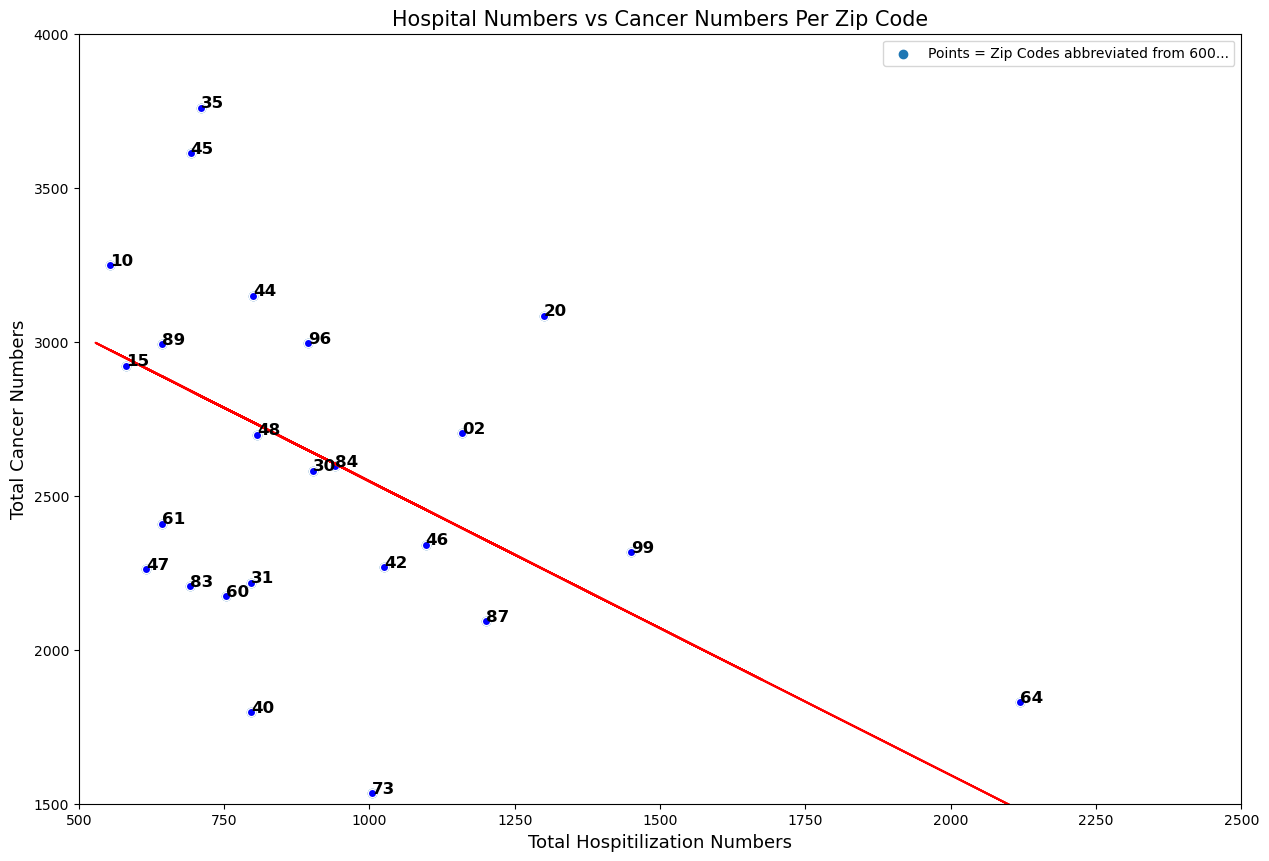

In [13]:
## Convert to floats and store Total Hospitilization and All_Cancer as x and y values
x_values = list(merge_df["Total Hospitilization Disclusion"].astype("float"))
y_values = list(merge_df["All_Cancer"].astype("float"))


fig, ax = plt.subplots(figsize = (15, 10))

# Plot scatter plot
ax.scatter(x_values,y_values)
for i, txt in enumerate(list(merge_df ['Abbreviated ZIP'])):
    ax.annotate(txt, (list(x_values)[i], list(y_values)[i]), fontsize = 12, fontweight = "bold")

plt.scatter(x_values, y_values, s=7)


# Label plot
plt.xlabel('Total Hospitilization Numbers', fontsize = 13)
plt.ylabel('Total Cancer Numbers',fontsize = 13)
plt.title ('Hospital Numbers vs Cancer Numbers Per Zip Code',fontsize = 15)
plt.scatter(merge_df["Total Hospitilization Disclusion"], merge_df["All_Cancer"], marker="o", facecolors="blue", edgecolors="white")

plt.xlim(500,2500)
plt.ylim(1500,4000)

# Linear regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = merge_df["Total Hospitilization Disclusion"] * slope + intercept

line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


print(f"R squared: {rvalue**2}")


plt.legend(["Points = Zip Codes abbreviated from 600..."])

plt.savefig('Hospitiization_vs_Cancer')



![alt text](Hospitiization_vs_Cancer.png)

# Cancer Hospitilizations Per Zip Code


R squared: 0.7138023752109515


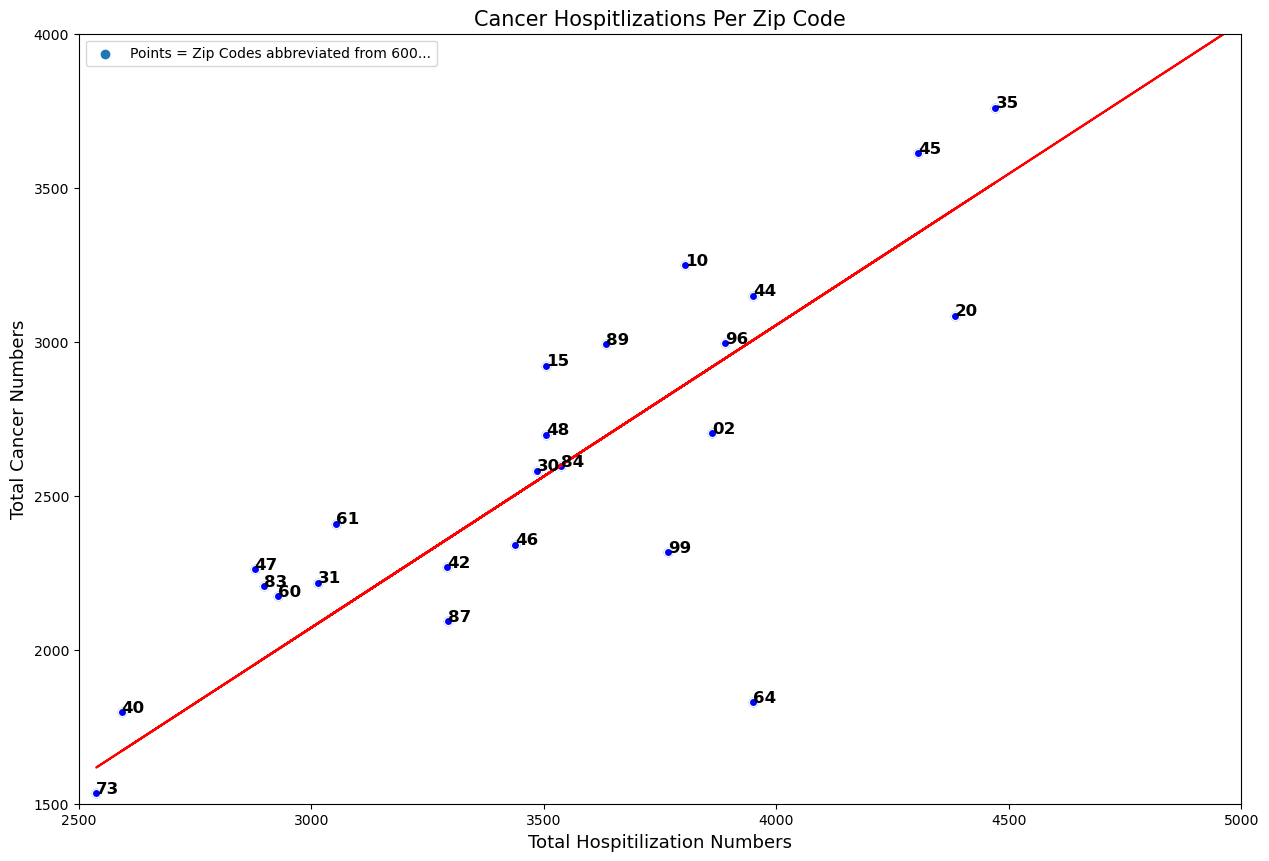

In [14]:
## Convert to floats and store Total Hospitilization and All_Cancer as x and y values
x_values = list(merge_df["Total Hospitilization Inclusion"].astype("float"))
y_values = list(merge_df["All_Cancer"].astype("float"))


fig, ax = plt.subplots(figsize = (15, 10))

# Plot scatter plot
ax.scatter(x_values,y_values)
for i, txt in enumerate(list(merge_df ['Abbreviated ZIP'])):
    ax.annotate(txt, (list(x_values)[i], list(y_values)[i]), fontsize = 12, fontweight = "bold")

plt.scatter(x_values, y_values, s=7)


# Label plot
plt.xlabel('Total Hospitilization Numbers', fontsize = 13)
plt.ylabel('Total Cancer Numbers',fontsize = 13)
plt.title ('Cancer Hospitlizations Per Zip Code',fontsize = 15)
plt.scatter(merge_df["Total Hospitilization Inclusion"], merge_df["All_Cancer"], marker="o", facecolors="blue", edgecolors="white")

plt.xlim(2500,5000)
plt.ylim(1500,4000)

# Linear regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = merge_df["Total Hospitilization Inclusion"] * slope + intercept

line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


print(f"R squared: {rvalue**2}")


plt.legend(["Points = Zip Codes abbreviated from 600..."])

plt.savefig('Cancer_Hospitilizations_Per_Zip_Code')

![alt text](Cancer_Hospitilizations_Per_Zip_Code.png)